In [12]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# wo, co, waer, wana, ko, cs, m, rs, ks = .2, 1, .35, .05, .2, .08, .05, .15, 10
# wo, co, waer, wana, ko, cs, m, rs, ks = .2, 1, .35, .1, .2, .08, .05, .1, 20
# wo, co, waer, wana, ko, cs, m, rs, ks = .02, 1, .035, .008, .1, .08, .05, .05, 20
# wo, co, waer, wana, ko, cs, m, rs, ks = .02, .5, .035, .008, .1, .08, .05, .1, 20
wo, co, waer, wana, ko, cs, m, rs, ks = .02, .4, .035, .008, .1, .08, .05, .08, 20

def ode(t, yos):
    Y, O, S = yos
    fO = O / (ko + O)

    dY = Y * (wo * co * O * fO + (waer + (waer - wana) * fO) * cs * S)
    dO = -co * Y * fO
    # dS = S * (ks - Y * cs - S)
    dS = rs * S * (1 - (S / ks)) - cs * Y * S

    return np.array([dY, dO, dS])

t0, tf = 0, 120
t_span = (t0, tf)
t_eval = np.linspace(t0, tf, 360)

# y0 = np.array([1, .25, 1])
y0 = np.array([1, .25, .5])

sol = solve_ivp(ode, (0, 120), y0, t_eval=t_eval)

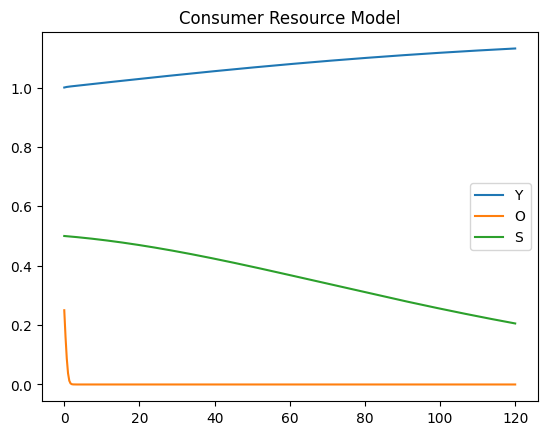

In [51]:
plt.plot(t_eval, sol.y[0, :], label='Y')
plt.plot(t_eval, sol.y[1, :], label='O')
plt.plot(t_eval, sol.y[2, :], label='S')
plt.title("Consumer Resource Model")
plt.legend()

plt.show()